In [1]:
import pandas as pd
df_2001 = pd.read_pickle('data/pred_2001.pkl')
df_2011 = pd.read_pickle('data/pred_2011.pkl')
df_2019 = pd.read_pickle('data/pred_2019.pkl')

In [2]:
df_2001.head()

,BF,FC,MSW,ASSET,LIT,ADI
27378,1,1,1,2,2,7
27379,1,1,1,2,2,7
27380,1,1,1,2,2,7
27381,1,1,1,2,2,7
27382,1,1,1,2,2,7


In [3]:
!pwd

/nvme/scratch/aman/reg_model_and_preds/Visualise_geojsons


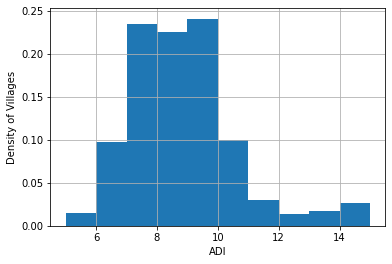

In [23]:
a = df_2001['ADI'].hist(density = True, width = 1).set(ylabel="Density of Villages", xlabel = "ADI")

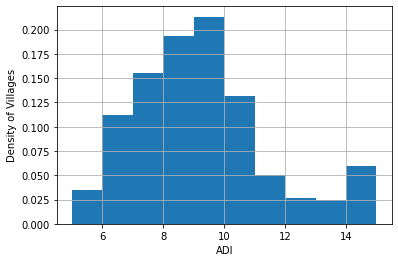

In [25]:
a = df_2011['ADI'].hist(density = True, width = 1).set(ylabel="Density of Villages", xlabel = "ADI")

In [3]:
df_2011["ADI"].value_counts()

9     72692
8     65854
7     52766
10    44723
6     38364
11    17150
15    13070
5     11871
12     8955
13     8250
14     7258
Name: ADI, dtype: int64

In [8]:
print(df_2011[df_2011["ADI"]<9].shape[0],df_2011[df_2011["ADI"]==9].shape[0],df_2011[df_2011["ADI"]>9].shape[0])

168855 72692 99406


In [4]:
def percentage(df):
    tl = df.shape[0]
    print("Less than 9",df[df["ADI"]<9].shape[0]*100/tl)
    print("Equal to 9",df[df["ADI"]==9].shape[0]*100/tl)
    print("Greater than 9",df[df["ADI"]>9].shape[0]*100/tl)


In [12]:
percentage(df_2001)

Less than 9 57.172955863913465
Equal to 9 24.06143071086582
Greater than 9 18.765613425220714


In [13]:
percentage(df_2011)

Less than 9 49.52442125454242
Equal to 9 21.320240619674852
Greater than 9 29.155338125782734


In [14]:
percentage(df_2019)

Less than 9 46.55649785962362
Equal to 9 29.306841127534124
Greater than 9 24.136661012842257


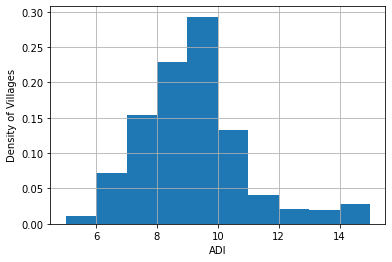

In [26]:
a = df_2019['ADI'].hist(density = True, width = 1).set(ylabel="Density of Villages", xlabel = "ADI")

In [6]:
import json
a_file = open("BR.geojson", "r")
bihardata = json.load(a_file)
a_file.close()

In [7]:
dict_2011 = {}
for i in df_2011.iterrows():
    dict_2011[i[0]] = i[1]['ADI']

In [18]:
df_2011[df_2011.index == 216179 ]

,BF,FC,MSW,ASSET,LIT,ADI
216179,1,1,2,1,2,7


In [11]:
for i in range(len(bihardata["features"])):
    if bihardata["features"][i]['properties']['pc11_district_id']==207.0 :
        print(bihardata["features"][i]['properties']['NAME'])

Mahinathpur
Khauna
Harlakhi
Harlakhi
kamlapatpatti
Lauthwa
Jonki
Majhaura
Garha
Jatulia
Bisaul
Bisaul
Chhitauni
Kaurna
Naharnia
Usrahi Deodha
Birta
Bhadaur
Motnaza
Simrarhi
Potgah
Potgah
kasera
Mahadeopatti
Mothaur
Lachhminia
Mahtha
Khataia
Belhi
Rajauli
Kumarkhad
Pipraun
Umgaon
Sothgaon
Sirahi
Hatwaria
Suhpur
Rampur
Mahua
Madhwapur
Dhamia Patti
Piprahi
Mangpatti
Parsa
Dubepatti
Dubepatti
kundalmaria
Mohanpur
kalna
Balwaha
Jogia
Bituhar
Baira
Paduma
Phulhar
Indarwa
Birpur
Basuki Bihari
Jaso
Parsa
Kauaha
Rampur birt
Rampur birt
Hurrahi
Suriahi
Gopalpur
Basopatti
Rampur
Lalmunia Munhara
Ram Nagar Kajra
Gangaur
Beta Parsa
Kamtaulia
karmegh
Barhi
Parwa
Sisauni
Sidhapa
Kamtaul
Silanath Dulipatti
Ghorbanki
Kauaha pahari
Kamtaul
Chiknautwa
jainagar
Garha
Sahar
Birpur Barapatti Pindraun
Bishunpur
Khoja
Lataunha
Manoharpur
Dodwar
kuar
Bauraha
Harswar
Hathapur
Pachratan
Chatar
Hisar
Pahra
Pahra
Durgapatti
Raima
Belahi
Mukhiapatti
Balwa
Lachhmipur
Sukhbasi
Sidhap Kalan
Pachhar
Gidhwas
Dharamban
D

In [20]:
ll = []
for i in range(len(bihardata["features"])):
    village_code = int(bihardata["features"][i]['properties']['pc11_village_id'])
    if village_code in dict_2011:
        adi = dict_2011[village_code]
        if (adi>=10) :
            bihardata["features"][i]['properties']["fill"] = "#00ff00"
        elif(adi<9):
            bihardata["features"][i]['properties']["fill"] = "#f40606"
        else :
            bihardata["features"][i]['properties']["fill"] = "#f8d112"
        ll.append(bihardata["features"][i])

In [21]:
bihardata['features'] = ll

In [22]:
a_file = open("bihar_2011_Data.geojson", "w")
json.dump(bihardata, a_file)
a_file.close()

In [25]:
import json
a_file = open("BR.geojson", "r")
bihardata = json.load(a_file)
a_file.close()

In [26]:
dict_2019 = {}
for i in df_2019.iterrows():
    dict_2019[i[0]] = i[1]['ADI']

In [27]:
ll = []
for i in range(len(bihardata["features"])):
    village_code = int(bihardata["features"][i]['properties']['pc11_village_id'])
    if village_code in dict_2019:
        adi = dict_2019[village_code]
        if (adi>=10) :
            bihardata["features"][i]['properties']["fill"] = "#00ff00"
        elif(adi<9):
            bihardata["features"][i]['properties']["fill"] = "#f40606"
        else :
            bihardata["features"][i]['properties']["fill"] = "#f8d112"
        ll.append(bihardata["features"][i])

In [28]:
a_file = open("bihar_2019_Data.geojson", "w")
json.dump(bihardata, a_file)
a_file.close()

In [34]:
dic_colour = {}
for i in range(len(ll)):
    dic_colour[ll[i]['properties']['fill']] = 1
print(dic_colour)

{'#00ff00': 1, '#f40606': 1, '#f8d112': 1}


In [35]:
len(ll)

27374

In [38]:
a_file = open("BR.geojson", "r")
bihardata = json.load(a_file)
a_file.close()
bihardata_2001 = bihardata.copy()
bihardata_2011 = bihardata.copy()
bihardata_2019 = bihardata.copy()

dict_2001 = {}
for i in df_2001.iterrows():
    dict_2001[i[0]] = i[1]['ADI']

dict_2011 = {}
for i in df_2011.iterrows():
    dict_2011[i[0]] = i[1]['ADI']

dict_2019 = {}
for i in df_2019.iterrows():
    dict_2019[i[0]] = i[1]['ADI']

def colour_code(df):
    ll = []
    for i in range(len(bihardata["features"])):
        village_code = int(bihardata["features"][i]['properties']['pc11_village_id'])
        if village_code in df:
            adi = df[village_code]
            if (adi>=10) :
                bihardata["features"][i]['properties']["fill"] = "#00ff00"
            elif(adi<9):
                bihardata["features"][i]['properties']["fill"] = "#f40606"
            else :
                bihardata["features"][i]['properties']["fill"] = "#f8d112"
            ll.append(bihardata["features"][i])
    return ll
ll_2001 = colour_code(dict_2001)
ll_2011 = colour_code(dict_2011)
ll_2019 = colour_code(dict_2019)

### 2001
bihardata_2001['features'] = ll_2001[:10000]
a_file = open("Part_Wise_Bihar/Bihar_2001_P1.geojson", "w")
json.dump(bihardata_2001, a_file)
a_file.close()

bihardata_2001['features'] = ll_2001[10000:20000]
a_file = open("Part_Wise_Bihar/Bihar_2001_P2.geojson", "w")
json.dump(bihardata_2001, a_file)
a_file.close()

bihardata_2001['features'] = ll_2001[20000:]
a_file = open("Part_Wise_Bihar/Bihar_2001_P3.geojson", "w")
json.dump(bihardata_2001, a_file)
a_file.close()

##2011
bihardata_2011['features'] = ll_2011[:10000]
a_file = open("Part_Wise_Bihar/Bihar_2011_P1.geojson", "w")
json.dump(bihardata_2011, a_file)
a_file.close()

bihardata_2011['features'] = ll_2011[10000:20000]
a_file = open("Part_Wise_Bihar/Bihar_2011_P2.geojson", "w")
json.dump(bihardata_2011, a_file)
a_file.close()

bihardata_2011['features'] = ll_2011[20000:]
a_file = open("Part_Wise_Bihar/Bihar_2011_P3.geojson", "w")
json.dump(bihardata_2011, a_file)
a_file.close()

#2019
bihardata_2019['features'] = ll_2019[:10000]
a_file = open("Part_Wise_Bihar/Bihar_2019_P1.geojson", "w")
json.dump(bihardata_2019, a_file)
a_file.close()

bihardata_2019['features'] = ll_2019[10000:20000]
a_file = open("Part_Wise_Bihar/Bihar_2019_P2.geojson", "w")
json.dump(bihardata_2019, a_file)
a_file.close()

bihardata_2019['features'] = ll_2019[20000:]
a_file = open("Part_Wise_Bihar/Bihar_2019_P3.geojson", "w")
json.dump(bihardata_2019, a_file)
a_file.close()
